import all the relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import io
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


upload the db file

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# **helper functions**

In [ ]:
const_seed = 42

In [ ]:
def calcCrossValidation_Matrix(model, df, predictors, outcome):

  total_tp = 0
  total_tn = 0
  total_fp = 0
  total_fn = 0

  # Perform k-fold cross-validation with 10 folds
  kf = KFold(n_splits=df.shape[0])
  accuracy = []
  for train, test in kf.split(df):
      # print("1")

      # Filter training data
      train_predictors = (df[predictors].iloc[train, :])
      # The target we're using to train the algorithm.
      train_target = df[outcome].iloc[train]
      # print("1")

      test_predictors = (df[predictors].iloc[test, :])
      # The target we're using to train the algorithm.
      test_target = df[outcome].iloc[test]
      # print("1")


      # Training the algorithm using the predictors and target.
      model.fit(train_predictors, train_target)
      predictions = model.predict(test_predictors)
      # cm = confusion_matrix(test_target, predictions)
      # print(cm)
      # print("1")
      # print("test_target")
      test_target = test_target.to_numpy()
      # print(test_target)
      # np.array(df[outcome].values.tolist())
      # print(type(test_target))
      # print("predictions")
      # print(predictions)
      # print(type(predictions))

      tn, fp, fn, tp = perf_measure(test_target, predictions)
      # print("1")

      total_tp += tp
      total_tn += tn
      total_fp += fp
      total_fn += fn

  # print(total_tn, total_fp, total_fn, total_tp)
  return total_tn, total_fp, total_fn, total_tp 

In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1
    # print(TN, FP, FN, TP)
    return(TN, FP, FN, TP)

In [ ]:
def calc_specificity(tn, fp, fn, tp):
  return tn / (tn +fp)

In [ ]:
def calc_sensitivity(tn, fp, fn, tp):
  return tp / (tp +fn)

#Coral experiments

In [ ]:
df_untreated = pd.read_pickle("/content/gdrive/My Drive/Colab Notebooks/MS_Notebooks/DFDB2Final.pkl")

df_untreated

In [ ]:
df_untreated.columns

Index(['sample_code', 'gender', 'age_at_diagnosis', 'diagnosis',
       'diagnosis_status', 'primary_EDSS_at_diagnosis',
       'num_of_medicine_changed', 'MRI_lesion_mass', 'oligoclonal_band',
       'TIGIT_RQ', 'TIM3_RQ', 'LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4',
       '1_years_EDSS_from_sample_date', '3_years_from_sample',
       '5_years_from_sample', 'EDSS_post_10_years', 'NEG', 'positive_OCB', 'F',
       'Male', 'BENIGN', 'MALIGNANT', 'STANDARD', 'diagnosis_RRMS', 'SPMS'],
      dtype='object')

In [ ]:
df_untreated.shape

(57, 27)

In [ ]:
# categorical_features = ['gender','oligoclonal_band','diagnosis']
# df_untreated = pd.get_dummies(df_untreated, columns=categorical_features, drop_first=True)
# df_untreated.drop(['treatment_when_sample_was_taken', 'sample_code'], axis='columns', inplace=True)
df_untreated = df_untreated[['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
       'TIGIT_RQ', 'TIM3_RQ', 'LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4',
       'positive_OCB',
       'Male', 'MALIGNANT', 'STANDARD','SPMS', 'EDSS_post_10_years']]
df_untreated


In [ ]:
df_untreated.shape

(57, 14)

In [ ]:
df_untreated.columns.values

array(['age_at_diagnosis', 'primary_EDSS_at_diagnosis', 'MRI_lesion_mass',
       'TIGIT_RQ', 'TIM3_RQ', 'LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4',
       'positive_OCB', 'Male', 'MALIGNANT', 'STANDARD', 'SPMS',
       'EDSS_post_10_years'], dtype=object)

all features

In [ ]:
def min_max_normalize_features(dataframe, numeric_list):
    for num_feature in numeric_list:
        dataframe[num_feature] = (dataframe[num_feature] - dataframe[num_feature].min()) / (
                dataframe[num_feature].max() - dataframe[num_feature].min())
    return dataframe

In [ ]:
numeric_features = ['age_at_diagnosis', 'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
       'TIGIT_RQ', 'TIM3_RQ', 'LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4']
df_untreated = min_max_normalize_features(df_untreated, numeric_features)
df_untreated

all features

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000, random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
       'TIGIT_RQ', 'TIM3_RQ', 'LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
coefficients = pd.concat([pd.DataFrame(predictor_var1), pd.DataFrame(np.transpose(logisticRegrDF.coef_))], axis=1)
coefficients.columns = ['feature_name', 'coefficient_val']
coefficients = coefficients.sort_values(by=['coefficient_val'], ascending=False)
coefficients.to_excel('coef_no_abs.xlsx')
coefficients['coefficient_val'] = coefficients['coefficient_val'].abs()

coefficients = coefficients.sort_values(by=['coefficient_val'], ascending=False)
coefficients.to_excel('coef_abs.xlsx')

print(coefficients)


1.0
0.85
                 feature_name  coefficient_val
10                  MALIGNANT         2.924745
1   primary_EDSS_at_diagnosis         0.857473
4                     TIM3_RQ         0.505537
2             MRI_lesion_mass         0.493807
9                        Male         0.445843
7                    RQ_CTLA4         0.329385
6                     PD-1_RQ         0.327388
5                     LAG3_RQ         0.261731
8                positive_OCB         0.208572
3                    TIGIT_RQ         0.177109
11                   STANDARD         0.039710
0            age_at_diagnosis         0.007485


1.0
0.85
Feature ranking:
1. feature 10 MALIGNANT (0.265207)
2. feature 1 primary_EDSS_at_diagnosis (0.152532)
3. feature 4 TIM3_RQ (0.109286)
4. feature 5 LAG3_RQ (0.094525)
5. feature 2 MRI_lesion_mass (0.092084)
6. feature 3 TIGIT_RQ (0.091120)
7. feature 6 PD-1_RQ (0.067685)
8. feature 0 age_at_diagnosis (0.043612)
9. feature 7 RQ_CTLA4 (0.035195)
10. feature 9 Male (0.021903)
11. feature 8 positive_OCB (0.019098)
12. feature 11 STANDARD (0.007754)


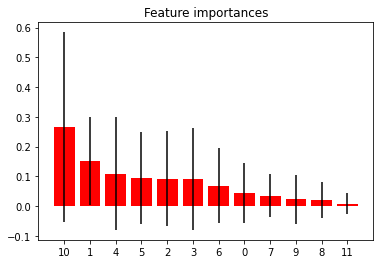

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
       'TIGIT_RQ', 'TIM3_RQ', 'LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
# importances = rf.feature_importances_
# importances
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(predictor_var1)):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f],predictor_var1[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictor_var1)), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(len(predictor_var1)), indices)
plt.xlim([-1, len(predictor_var1)])
plt.show()


no genes

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass','positive_OCB',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
coefficients = pd.concat([pd.DataFrame(predictor_var1), pd.DataFrame(np.transpose(logisticRegrDF.coef_))], axis=1)
coefficients.columns = ['feature_name', 'coefficient_val']
coefficients = coefficients.sort_values(by=['coefficient_val'], ascending=False)
coefficients.to_excel('coef_no_abs.xlsx')
coefficients['coefficient_val'] = coefficients['coefficient_val'].abs()

coefficients = coefficients.sort_values(by=['coefficient_val'], ascending=False)
coefficients.to_excel('coef_abs.xlsx')

print(coefficients) 

1.0
0.85
                feature_name  coefficient_val
5                  MALIGNANT         3.009940
1  primary_EDSS_at_diagnosis         0.890063
2            MRI_lesion_mass         0.489378
4                       Male         0.419725
3               positive_OCB         0.241293
6                   STANDARD         0.043244
0           age_at_diagnosis         0.029925


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass','positive_OCB',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

1.0
0.85


no TIM3

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
       'MRI_lesion_mass',
       'TIGIT_RQ','LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))


1.0
0.85


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
       'TIGIT_RQ','LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

1.0
0.85


In [ ]:
df_untreated

no TIGIT_RQ

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
       'TIM3_RQ', 'LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))
coefficients = pd.concat([pd.DataFrame(predictor_var1), pd.DataFrame(np.transpose(logisticRegrDF.coef_))], axis=1)
coefficients.columns = ['feature_name', 'coefficient_val']
coefficients = coefficients.sort_values(by=['coefficient_val'], ascending=False)
coefficients.to_excel('coef_no_abs.xlsx')
coefficients['coefficient_val'] = coefficients['coefficient_val'].abs()

coefficients = coefficients.sort_values(by=['coefficient_val'], ascending=False)
coefficients.to_excel('coef_abs.xlsx')

print(coefficients)

1.0
0.85
                 feature_name  coefficient_val
9                   MALIGNANT         2.923062
1   primary_EDSS_at_diagnosis         0.864680
3                     TIM3_RQ         0.512115
2             MRI_lesion_mass         0.494070
8                        Male         0.442650
6                    RQ_CTLA4         0.327446
5                     PD-1_RQ         0.325067
4                     LAG3_RQ         0.278657
7                positive_OCB         0.224503
10                   STANDARD         0.043350
0            age_at_diagnosis         0.024414


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
       'TIM3_RQ', 'LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

1.0
0.85


no LAG3

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
       'MRI_lesion_mass',
       'TIGIT_RQ', 'TIM3_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

1.0
0.85


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
       'TIGIT_RQ', 'TIM3_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

1.0
0.85


no TIM3 and LAG3

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
       'MRI_lesion_mass',
       'TIGIT_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))


1.0
0.85


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
       'TIGIT_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

1.0
0.85


no TIM3 and TIGIT

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
        'LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))


1.0
0.85


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
       'MRI_lesion_mass',
        'LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

1.0
0.85


no LAG3 and TIGIT

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
        'TIM3_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))


1.0
0.85


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
        'TIM3_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.972972972972973
0.85


no diagnosis status

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
       'TIGIT_RQ', 'TIM3_RQ', 'LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))


0.8918918918918919
0.3


In [ ]:
df_untreated.shape

(57, 14)

In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
       'TIGIT_RQ', 'TIM3_RQ', 'LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8378378378378378
0.3


no OCB

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
       'TIGIT_RQ', 'TIM3_RQ', 'LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

1.0
0.85


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
       'MRI_lesion_mass',
       'TIGIT_RQ', 'TIM3_RQ', 'LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

1.0
0.85


no RQ_CTLA4

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
       'TIGIT_RQ', 'TIM3_RQ', 'LAG3_RQ', 'PD-1_RQ', 'positive_OCB',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

1.0
0.85


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
       'TIGIT_RQ', 'TIM3_RQ', 'LAG3_RQ', 'PD-1_RQ', 'positive_OCB',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.972972972972973
0.85


no PD1

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
       'TIGIT_RQ', 'TIM3_RQ', 'LAG3_RQ', 'RQ_CTLA4','positive_OCB',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

1.0
0.85


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
       
        'MRI_lesion_mass',
       'TIGIT_RQ', 'TIM3_RQ', 'LAG3_RQ', 'RQ_CTLA4','positive_OCB',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

1.0
0.85


no diagnosis status, OCB

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
       'TIGIT_RQ', 'TIM3_RQ', 'LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4',
       'Male']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.918918918918919
0.3


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
       'TIGIT_RQ', 'TIM3_RQ', 'LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4',
       'Male']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8648648648648649
0.4


no diagnosis status, LAG3

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
       'TIGIT_RQ', 'TIM3_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8918918918918919
0.25


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
       'TIGIT_RQ', 'TIM3_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8378378378378378
0.5


no diagnosis status, TIGIT

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
        'TIM3_RQ', 'LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.918918918918919
0.3


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
        'TIM3_RQ', 'LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8378378378378378
0.4


no diagnosis status, TIM3, LAG3

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
       'TIGIT_RQ','PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.972972972972973
0.2


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
       'TIGIT_RQ','PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8918918918918919
0.45


no diagnosis status, TIM3, TIGIT

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
        'LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.9459459459459459
0.25


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
        'LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8648648648648649
0.3


no diagnosis status, TIGIT, LAG3

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
        'TIM3_RQ','PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.918918918918919
0.25


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
        'MRI_lesion_mass',
        'TIM3_RQ','PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

0.8648648648648649
0.45


no mri

In [ ]:
from sklearn.metrics import confusion_matrix

logisticRegrDF = LogisticRegression(max_iter = 4000,random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
       'TIGIT_RQ', 'TIM3_RQ', 'LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(logisticRegrDF, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

1.0
0.85


In [ ]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=25, min_samples_split=9, max_depth=15, max_features='auto',random_state=const_seed)
predictor_var1 = ['age_at_diagnosis',
       'primary_EDSS_at_diagnosis',
       'TIGIT_RQ', 'TIM3_RQ', 'LAG3_RQ', 'PD-1_RQ', 'RQ_CTLA4','positive_OCB',
       'Male', 'MALIGNANT', 'STANDARD']
outcome_var = 'SPMS'
tn, fp, fn, tp = calcCrossValidation_Matrix(rf, df_untreated, predictor_var1, outcome_var)
print(calc_specificity(tn, fp, fn, tp))
print(calc_sensitivity(tn, fp, fn, tp))

1.0
0.85
